In [1]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
X_valid, X_train = X_train_full[0:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[0:5000], y_train_full[5000:]

In [3]:
 class_names = ["T-shirt/top", "Trouser", "Pullover","Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [6]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7292 - accuracy: 0.7635 - val_loss: 0.4946 - val_accuracy: 0.8338
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4878 - accuracy: 0.8280 - val_loss: 0.4483 - val_accuracy: 0.8434
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4437 - accuracy: 0.8445 - val_loss: 0.5067 - val_accuracy: 0.8178
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4169 - accuracy: 0.8526 - val_loss: 0.3919 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3961 - accuracy: 0.8619 - val_loss: 0.3967 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3799 - accuracy: 0.8650 - val_loss: 0.3751 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3664 - accuracy: 0.8696 - val_loss: 0.3656 - val_accuracy:

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 67.2104 - accuracy: 0.8499


[67.2104263305664, 0.8499000072479248]

In [178]:
import numpy as np

In [179]:
tf.__version__

'2.6.0'

In [180]:
from tensorflow import keras
print("keras version", keras.__version__)

keras version 2.6.0


In [181]:
import matplotlib.pyplot as plt

In [182]:
np.random.seed(42)
tf.random.set_seed(42)

In [183]:
fashion_mnist = keras.datasets.fashion_mnist

In [184]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [185]:
X_train_full.shape

(60000, 28, 28)

In [186]:
X_valid = X_train_full[0:5000]/255

In [187]:
y_valid = y_train_full[:5000]/255

In [188]:
X_train = X_train_full[5000:]/255

In [189]:
y_train = y_train_full[5000:]/255

In [190]:
print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:", X_test.shape)

Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)


In [191]:
X_test = X_test/255

In [192]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class label is: 0.01568627450980392
Class name is: T-shirt/top


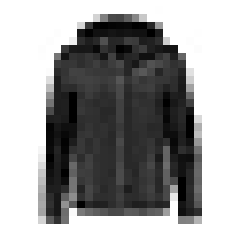

In [193]:
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0].astype(np.int64)])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

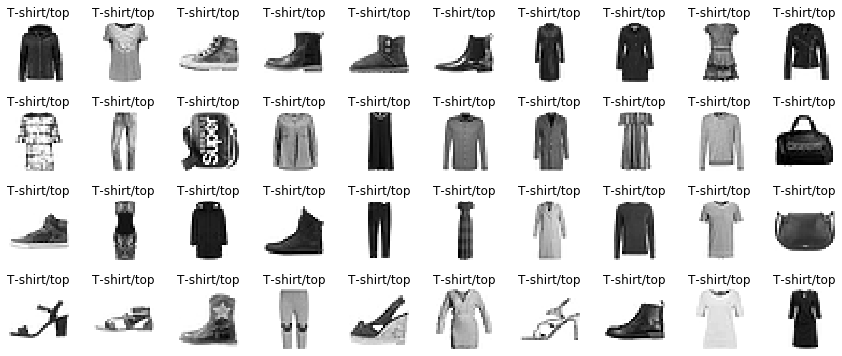

In [194]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index].astype(np.int64)], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [195]:
keras.backend.clear_session()

In [196]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [197]:
model.layers

In [198]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


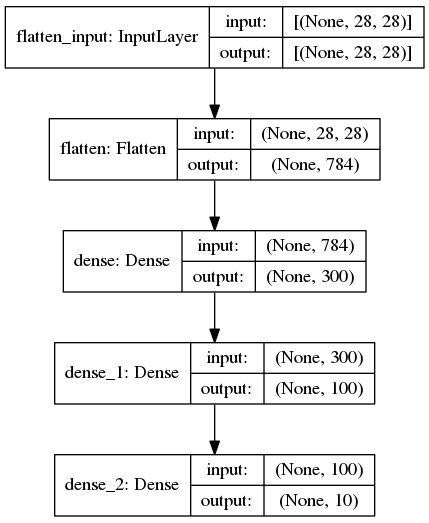

In [199]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [200]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [201]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [202]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.1008 - val_loss: 0.0010 - val_accuracy: 0.0914
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 7.3909e-04 - accuracy: 0.1008 - val_loss: 4.6916e-04 - val_accuracy: 0.0914
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 4.0634e-04 - accuracy: 0.1008 - val_loss: 3.0270e-04 - val_accuracy: 0.0914
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 2.7769e-04 - accuracy: 0.1008 - val_loss: 2.2211e-04 - val_accuracy: 0.0914
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 2.0974e-04 - accuracy: 0.1008 - val_loss: 1.7489e-04 - val_accuracy: 0.0914
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6792e-04 - accuracy: 0.1008 - val_loss: 1.4392e-04 - val_accuracy: 0.0914
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 1.3966e-04 - accurac

In [203]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [204]:
hidden1 = model.layers[1]
print(hidden1.name)

dense


In [205]:
weights, biases = hidden1.get_weights()
print(weights.shape, weights)
print(biases)

(784, 300) [[ 0.02448617 -0.00877795 -0.02189048 ... -0.02766038  0.03859074
  -0.0688939 ]
 [ 0.00476518 -0.03105379 -0.0586676  ...  0.0060304  -0.02763776
  -0.04165363]
 [-0.06189268 -0.06901957  0.07102343 ... -0.04238047  0.07121518
  -0.07331639]
 ...
 [-0.03048314  0.02157563 -0.05401033 ... -0.00099384  0.00225105
   0.05592814]
 [ 0.07061885 -0.06959603  0.07037686 ... -0.00372812  0.00032505
   0.02888224]
 [-0.0602258   0.01578107 -0.0258562  ... -0.00526755  0.00271854
  -0.06792966]]
[ 2.32004491e-03  1.76938588e-03 -1.95810266e-04 -5.99713111e-03
  1.83662139e-02 -4.31722403e-03  3.38976434e-03 -3.65307089e-03
 -1.37668103e-04  8.54713842e-03 -6.43927371e-03  1.26313331e-04
  8.54681991e-03  3.48359183e-03  1.42787416e-02  8.92734213e-04
  3.81359868e-02  8.19909852e-03 -3.07077914e-03  1.75255293e-03
  4.12468612e-02  3.38570289e-02 -6.86028413e-03  1.84906814e-02
  1.54927615e-02  2.18246486e-02  4.06090367e-05  3.10101267e-03
  2.31279549e-03  8.20130017e-03  2.275332

<function matplotlib.pyplot.show(*args, **kw)>

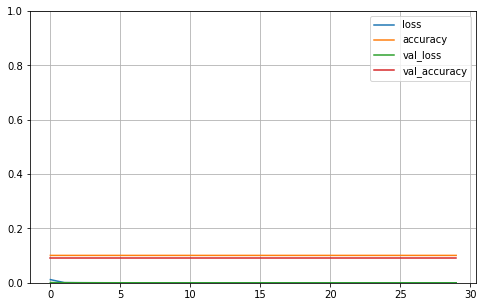

In [206]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [210]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 31.1878 - accuracy: 0.1000


[31.187789916992188, 0.10000000149011612]

In [212]:
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])

[0 0 0]
['T-shirt/top', 'T-shirt/top', 'T-shirt/top']


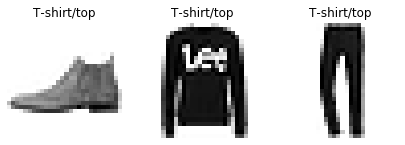

In [217]:
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()